# Image to features

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from PIL import Image
from tqdm import tqdm

FOLDER_INPUT_PATH = "../data_students/labeled_data/"
FOLDER_OUTPUT_PATH = "../data_students/labeled_data/img_features/"

FOLDER_INPUT_PATH_PREDICT = "../data_students/unlabeled_data/"
FOLDER_OUTPUT_PATH_PREDICT = "../data_students/unlabeled_data/"

def get_variable_name(variable, namespace):
    return [name for name, value in namespace.items() if value is variable][0]

# Cropping

In [6]:
def crop_images(mode, border_size=5):
    if mode not in ['train', 'test', 'predict']:
        raise ValueError("Mode must be either 'train' or 'test'.")
    
    if mode == 'predict':
        input_folder_predict = f"{FOLDER_INPUT_PATH_PREDICT}Img/"
        output_folder_predict = f"{FOLDER_OUTPUT_PATH_PREDICT}Img_cropped/"

        if not os.path.exists(output_folder_predict):
            os.makedirs(output_folder_predict)

        image_files_predict = [f for f in sorted(os.listdir(input_folder_predict)) if f.endswith('.png')]
        for filename in tqdm(image_files_predict, desc=f"Cropping borders for {mode} images"):
            img_path = os.path.join(input_folder_predict, filename)
            img = Image.open(img_path)

            width, height = img.size

            cropped_img = img.crop((
                border_size,  # Left
                border_size,  # Top
                width - border_size,  # Right
                height - border_size  # Bottom
            ))
            cropped_img.save(os.path.join(output_folder_predict, filename))

        print(f"Cropped images saved to {output_folder_predict}")

    else :
        input_folder = f"{FOLDER_INPUT_PATH}Img_{mode}/"
        output_folder = f"{FOLDER_INPUT_PATH}Img_{mode}_cropped/"

        if not os.path.exists(output_folder):
            os.makedirs(output_folder)

        image_files = [f for f in sorted(os.listdir(input_folder)) if f.endswith('.png')]
        for filename in tqdm(image_files, desc=f"Cropping borders for {mode} images"):
            img_path = os.path.join(input_folder, filename)
            img = Image.open(img_path)

            width, height = img.size

            cropped_img = img.crop((
                border_size,  # Left
                border_size,  # Top
                width - border_size,  # Right
                height - border_size  # Bottom
            ))
            cropped_img.save(os.path.join(output_folder, filename))

        print(f"Cropped images saved to {output_folder}")

crop_images('train')
crop_images('test')
crop_images('predict')

Cropping borders for train images: 100%|██████████| 1000/1000 [00:00<00:00, 3764.29it/s]


Cropped images saved to ../data_students/labeled_data/Img_train_cropped/


Cropping borders for test images: 100%|██████████| 500/500 [00:00<00:00, 4933.98it/s]


Cropped images saved to ../data_students/labeled_data/Img_test_cropped/


Cropping borders for predict images: 100%|██████████| 500/500 [00:00<00:00, 5069.04it/s]

Cropped images saved to ../data_students/unlabeled_data/Img_cropped/


# Direct flattening

In [9]:
def flatten_images(mode, cropped=True):
    if mode not in ['train', 'test', 'predict']:
        raise ValueError("Mode must be either 'train' or 'test'.")

    if mode == 'predict':
        if cropped:
            input_folder = f"{FOLDER_INPUT_PATH_PREDICT}Img_cropped/"
        else:
            input_folder = f"{FOLDER_INPUT_PATH_PREDICT}Img/"
        output_csv = f"{FOLDER_OUTPUT_PATH_PREDICT}img_features/img_feat_flat_{mode}.csv"

        flattened_images = []
        filenames = []

        image_files = [f for f in os.listdir(input_folder) if f.endswith('.png')]
        image_files.sort()

        for filename in tqdm(image_files, desc=f"Flattening {'cropped ' if cropped else ''}images for {mode}"):
            img_path = os.path.join(input_folder, filename)
            img = Image.open(img_path)
            img_gray = img.convert('L')
            img_array = np.array(img_gray).flatten()

            flattened_images.append(img_array)
            filenames.append(filename)

        if len(flattened_images) > 0:
            num_pixels = len(flattened_images[0])
            column_names = [f'pixel_{i + 1}' for i in range(num_pixels)]
        else:
            raise ValueError("No valid images found in the folder.")
        
        flattened_images_df = pd.DataFrame(flattened_images, columns=column_names)
        flattened_images_df['img_filename'] = filenames

        flattened_images_df.to_csv(output_csv, index=False)
        print(f"Flattened images for {mode} saved to {output_csv}.")

    else :
        if cropped:
            input_folder = f"{FOLDER_INPUT_PATH}Img_{mode}_cropped/"
        else:
            input_folder = f"{FOLDER_INPUT_PATH}Img_{mode}/"
        output_csv = f"{FOLDER_OUTPUT_PATH}img_feat_flat_{mode}.csv"

        flattened_images = []
        filenames = []

        image_files = [f for f in os.listdir(input_folder) if f.endswith('.png')]
        image_files.sort()

        for filename in tqdm(image_files, desc=f"Flattening {'cropped ' if cropped else ''}images for {mode}"):
            img_path = os.path.join(input_folder, filename)
            img = Image.open(img_path)
            img_gray = img.convert('L')
            img_array = np.array(img_gray).flatten()

            flattened_images.append(img_array)
            filenames.append(filename)

        if len(flattened_images) > 0:
            num_pixels = len(flattened_images[0])
            column_names = [f'pixel_{i + 1}' for i in range(num_pixels)]
        else:
            raise ValueError("No valid images found in the folder.")

        flattened_images_df = pd.DataFrame(flattened_images, columns=column_names)
        flattened_images_df['img_filename'] = filenames

        flattened_images_df.to_csv(output_csv, index=False)
        print(f"Flattened images for {mode} saved to {output_csv}.")

flatten_images('train')
flatten_images('test')
flatten_images('predict')
# flatten_images('train', cropped=False)
# flatten_images('test', cropped=False)


Flattening cropped images for train: 100%|██████████| 1000/1000 [00:00<00:00, 17159.18it/s]


Flattened images for train saved to ../data_students/labeled_data/img_features/img_feat_flat_train.csv.


Flattening cropped images for test: 100%|██████████| 500/500 [00:00<00:00, 21769.59it/s]


Flattened images for test saved to ../data_students/labeled_data/img_features/img_feat_flat_test.csv.


Flattening cropped images for predict: 100%|██████████| 500/500 [00:00<00:00, 17274.16it/s]


Flattened images for predict saved to ../data_students/unlabeled_data/img_features/img_feat_flat_predict.csv.


# Using SKLEARN

In [ ]:
import cv2
from skimage.color import rgb2gray
from skimage.feature import hog, corner_harris, corner_peaks, canny
from skimage.io import imread


def extract_image_features_hog(image_path):
    image = imread(image_path, as_gray=True)
    features, _ = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    return features


def extract_image_features_orb(image_path):
    resize_dim=(224, 224)
    n_keypoints=500
    max_features = 500

    image = imread(image_path)

    if len(image.shape) == 2:  # Grayscale images
        gray_image = image
    else:
        gray_image = rgb2gray(image)
        gray_image = (gray_image * 255).astype(np.uint8)

    resized_image = cv2.resize(gray_image, resize_dim, interpolation=cv2.INTER_LINEAR)

    orb = cv2.ORB_create(n_keypoints)
    _, descriptors = orb.detectAndCompute(resized_image, None)

    if descriptors is None:
        return np.zeros((n_keypoints * 32,), dtype=np.float32)  # Default ORB descriptor size is 32

    descriptors = descriptors.flatten()

    if descriptors.shape[0] < max_features:
        padded_descriptors = np.zeros((max_features,), dtype=np.float32)
        padded_descriptors[:descriptors.shape[0]] = descriptors
        return padded_descriptors
    else:
        return descriptors[:max_features]

def extract_image_features_harris(image_path):
    image = imread(image_path)

    if len(image.shape) == 2:
        gray_image = image
    else:
        gray_image = rgb2gray(image)

    corners = corner_peaks(corner_harris(gray_image), min_distance=5)

    num_corners = len(corners)
    features = np.array([num_corners], dtype=np.float32)
    return features


def extract_image_features_canny(image_path):
    image = imread(image_path)

    if len(image.shape) == 2:
        gray_image = image
    else:
        gray_image = rgb2gray(image)

    edges = canny(gray_image, sigma=1.0)

    edge_percentage = np.sum(edges) / edges.size
    features = np.array([edge_percentage], dtype=np.float32)
    return features

def extract_image_features_sift(image_path):
    resize_dim=(224, 224)
    n_features=500
    descriptor_size=200
    
    image = imread(image_path)
    if len(image.shape) == 2:  # Grayscale images
        gray_image = image
    else:
        gray_image = rgb2gray(image)
        gray_image = (gray_image * 255).astype(np.uint8)

    resized_image = cv2.resize(gray_image, resize_dim, interpolation=cv2.INTER_LINEAR)

    sift = cv2.SIFT_create(nfeatures=n_features)
    _, descriptors = sift.detectAndCompute(resized_image, None)

    if descriptors is None:
        return np.zeros((descriptor_size,), dtype=np.float32)

    descriptors = descriptors.flatten()
    if descriptors.size < descriptor_size:
        padded_descriptors = np.zeros((descriptor_size,), dtype=np.float32)
        padded_descriptors[:descriptors.size] = descriptors
        return padded_descriptors
    else:
        return descriptors[:descriptor_size]

In [ ]:
def create_features(mode, extractor, cropped=True):
    if mode not in ['train', 'test', 'predict']:
        raise ValueError("Mode must be either 'train' or 'test'.")
    
    if mode == 'predict':
        if cropped:
            image_folder = f"{FOLDER_INPUT_PATH_PREDICT}Img_cropped/"
        else:
            image_folder = f"{FOLDER_INPUT_PATH_PREDICT}Img/"
        output_feature_csv = f"{FOLDER_OUTPUT_PATH_PREDICT}img_features/img_feat_{extractor}_{mode}.csv"

        feature_list = []
        filenames = []

        image_files = [img_file for img_file in sorted(os.listdir(image_folder)) if img_file.endswith('.png')]

        for img_file in tqdm(image_files, desc=f"Processing {mode} images"):
            img_path = os.path.join(image_folder, img_file)
            
            features = None
            if extractor == 'hog':
                features = extract_image_features_hog(img_path)
            elif extractor == 'orb':
                features = extract_image_features_orb(img_path)
            elif extractor == 'harris':
                features = extract_image_features_harris(img_path)
            elif extractor == 'ced':
                features = extract_image_features_canny(img_path)
            feature_list.append(features)
            filenames.append(img_file)

    for img_file in tqdm(image_files, desc=f"Processing {mode} images"):
        img_path = os.path.join(image_folder, img_file)
        
        features = None
        if extractor == 'hog':
            features = extract_image_features_hog(img_path)
        elif extractor == 'orb':
            features = extract_image_features_orb(img_path)
        elif extractor == 'harris':
            features = extract_image_features_harris(img_path)
        elif extractor == 'ced':
            features = extract_image_features_canny(img_path)
        elif extractor == 'sift':
            features = extract_image_features_sift(img_path)
        feature_list.append(features)
        filenames.append(img_file)

    else : 
        if cropped:
            image_folder = f"{FOLDER_INPUT_PATH}Img_{mode}_cropped/"
        else:
            image_folder = f"{FOLDER_INPUT_PATH}Img_{mode}/"
        output_feature_csv = f"{FOLDER_OUTPUT_PATH}img_feat_{extractor}_{mode}.csv"

        feature_list = []
        filenames = []

        image_files = [img_file for img_file in sorted(os.listdir(image_folder)) if img_file.endswith('.png')]

        for img_file in tqdm(image_files, desc=f"Processing {mode} images"):
            img_path = os.path.join(image_folder, img_file)
            
            features = None
            if extractor == 'hog':
                features = extract_image_features_hog(img_path)
            elif extractor == 'orb':
                features = extract_image_features_orb(img_path)
            elif extractor == 'harris':
                features = extract_image_features_harris(img_path)
            elif extractor == 'ced':
                features = extract_image_features_canny(img_path)
            feature_list.append(features)
            filenames.append(img_file)

        feature_df = pd.DataFrame(feature_list)
        feature_df['img_filename'] = filenames
        feature_df.to_csv(output_feature_csv, index=False)
        print(f"Image features for {mode} saved to {output_feature_csv}.")


# create_features('train', 'hog')
# create_features('test', 'hog')
create_features('train', 'orb')
create_features('test', 'orb')
# create_features('train', 'harris')
# create_features('test', 'harris')
# create_features('train', 'ced')
# create_features('test', 'ced')
# create_features('train', 'sift')
# create_features('test', 'sift')

Processing train images: 100%|██████████| 1000/1000 [00:00<00:00, 3702.72it/s]


Image features for train saved to ../data_students/labeled_data/img_features/img_feat_ced_train.csv.


Processing test images: 100%|██████████| 500/500 [00:00<00:00, 4017.64it/s]


Image features for test saved to ../data_students/labeled_data/img_features/img_feat_ced_test.csv.


Processing predict images: 100%|██████████| 500/500 [00:00<00:00, 2415.61it/s]

Image features for predict saved to ../data_students/unlabeled_data/img_features/img_feat_ced_predict.csv.


# Using PyTorch

In [13]:
from pathlib import Path
from PIL import Image
import torch
from torch import nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import datasets, transforms
import torchvision.models as models
import torchvision.transforms as transforms
from tqdm import tqdm

##### Dataset transformations

In [30]:
class ImagesDataset(torch.utils.data.Dataset):
    def __init__(self, image_folder, label_file, transform=None):
        self.image_paths = sorted(list(Path(image_folder).glob("*.png")))
        self.labels = pd.read_csv(label_file, header=None).values.flatten()
        self.transform = transform
        assert len(self.image_paths) == len(self.labels), "Mismatch between images and labels!"

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        image = Image.open(img_path).convert("L")
        if self.transform:
            image = self.transform(image)
        return image, torch.tensor([label], dtype=torch.float32)
    
class ImagesDatasetUnlabeled(torch.utils.data.Dataset):
    def __init__(self, image_folder, transform=None):
        self.image_paths = sorted(list(Path(image_folder).glob("*.png")))
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("L")
        if self.transform:
            image = self.transform(image)
        return image

class TransformDataset(Dataset):
    def __init__(self, dataset, indices, transform=None):
        self.dataset = dataset
        self.indices = indices
        self.transform = transform

        if hasattr(dataset, 'image_paths'):
            self.image_paths = [dataset.image_paths[i] for i in indices]
        else:
            self.image_paths = [None] * len(indices)

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, idx):
        original_idx = self.indices[idx]
        image, label = self.dataset[original_idx]
        if self.transform:
            image = self.transform(image)
        return image, label

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),          # Randomly flip the image horizontally
    transforms.RandomVerticalFlip(p=0.5),            # Randomly flip the image vertically
    transforms.RandomRotation(degrees=15),           # Randomly rotate the image by up to 15 degrees
    transforms.ColorJitter(brightness=0.2,           # Randomly adjust brightness, contrast, and saturation
                           contrast=0.2,
                           saturation=0.2,
                           hue=0.1),
    transforms.Grayscale(num_output_channels=1),    # Convert to grayscale
    transforms.Resize((32, 32)),                    # Resize to match the model's input size
    transforms.ToTensor(),                          # Convert the image to a PyTorch tensor
    transforms.Normalize((0.5,), (0.5,))            # Normalize to [-1, 1]
])
val_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))            # Normalize to [-1, 1]
])
train_pretrained_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.2),
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

##### Simple data

In [31]:
train_image_folder = f"{FOLDER_INPUT_PATH}Img_train_cropped/"
train_label_file = f"{FOLDER_INPUT_PATH}y_train.csv"
test_image_folder = f"{FOLDER_INPUT_PATH}Img_test_cropped/"
test_label_file = f"{FOLDER_INPUT_PATH}y_test.csv"

predict_image_folder = f"{FOLDER_INPUT_PATH_PREDICT}Img_cropped/"


train_dataset = ImagesDataset(train_image_folder, train_label_file, transform=transform)
test_dataset = ImagesDataset(test_image_folder, test_label_file, transform=transform)
predict_dataset = ImagesDatasetUnlabeled(predict_image_folder, transform=transform)

train_split_ratio = 0.8
train_size = int(train_split_ratio * len(train_dataset))
val_size = len(train_dataset) - train_size
train_indices, val_indices = torch.utils.data.random_split(
    range(len(train_dataset)), [train_size, val_size]
)

train_subset = TransformDataset(train_dataset, train_indices, transform=None)
val_subset = TransformDataset(train_dataset, val_indices, transform=None)

##### Data augmentation

In [ ]:
train_image_folder = f"{FOLDER_INPUT_PATH}Img_train_cropped/"
train_label_file = f"{FOLDER_INPUT_PATH}y_train.csv"
test_image_folder = f"{FOLDER_INPUT_PATH}Img_test_cropped/"
test_label_file = f"{FOLDER_INPUT_PATH}y_test.csv"


train_dataset = ImagesDataset(train_image_folder, train_label_file, transform=None)
test_dataset = ImagesDataset(test_image_folder, test_label_file, transform=val_transform)

train_split_ratio = 0.8
train_size = int(train_split_ratio * len(train_dataset))
val_size = len(train_dataset) - train_size

train_indices, val_indices = torch.utils.data.random_split(
    range(len(train_dataset)), [train_size, val_size]
)

train_subset = TransformDataset(train_dataset, train_indices.indices, transform=train_transform)
val_subset = TransformDataset(train_dataset, train_indices.indices, transform=val_transform)

##### Training and eval

In [22]:
def train_model(model, train_loader, val_loader, learning_rate, num_epochs, pretrained=False):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    train_losses = []
    val_losses = []
    criterion = nn.BCEWithLogitsLoss()
    optimizer = Adam(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs} [Training]")
        
        for images, labels in progress_bar:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            progress_bar.set_postfix(train_loss=(train_loss / (progress_bar.n + 1)))

        # Validation phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                if pretrained:
                    outputs = torch.sigmoid(model(images))
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        train_loss /= len(train_loader)
        val_loss /= len(val_loader)
        print(f"Epoch {epoch + 1} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        checkpoint_path = f"pretrained/{type(model).__name__}_e{epoch + 1}.pth"
        torch.save(model.state_dict(), checkpoint_path)
        print(f"Model weights saved for epoch {epoch + 1} as '{checkpoint_path}'")

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
    plt.plot(range(1, len(train_losses) + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Train and Validation Loss Over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

    return train_losses, val_losses

def test_model(model, test_loader, pretrained=False):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    criterion = nn.BCEWithLogitsLoss()
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            if pretrained:
                outputs = torch.sigmoid(model(images))
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            predictions = (outputs > 0.5).float()
            correct += (predictions == labels).sum().item()
            total += labels.size(0)
    
    accuracy = correct / total * 100 if total > 0 else 0
    print(f"Test Loss: {test_loss / len(test_loader):.4f}, Test Accuracy: {accuracy:.2f}%")
    return test_loss / len(test_loader), accuracy

### Pre-trained models

In [23]:
import torchvision.models as models

NUM_CLASSES = 1

resnet18 = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
resnet18.fc = nn.Linear(resnet18.fc.in_features, NUM_CLASSES)

squeezenet = models.squeezenet1_0(weights=SqueezeNet1_0_Weights.IMAGENET1K_V1)
squeezenet.classifier = nn.Sequential(
    nn.Dropout(0.7),
    nn.Conv2d(512, NUM_CLASSES, kernel_size=1),
    nn.Sigmoid(),
    nn.AdaptiveAvgPool2d((1, 1)),
    nn.Flatten()
)

mobilenetv3 = models.mobilenet_v3_small(weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1)
mobilenetv3.classifier = nn.Sequential(
    nn.Linear(mobilenetv3.classifier[0].in_features, NUM_CLASSES),
)

for model in [resnet18, squeezenet, mobilenetv3]:
    for param in model.parameters():
        param.requires_grad = False
    if isinstance(model, models.ResNet):
        model.fc.weight.requires_grad = True
        model.fc.bias.requires_grad = True
    elif isinstance(model, models.SqueezeNet):
        for param in model.classifier.parameters():
            param.requires_grad = True
    elif isinstance(model, models.MobileNetV3):
        for param in model.classifier.parameters():
            param.requires_grad = True

NameError: name 'ResNet18_Weights' is not defined

Epoch 1/10 [Training]: 100%|██████████| 25/25 [00:03<00:00,  6.75it/s, train_loss=0.385]


Epoch 1 - Train Loss: 0.3845, Val Loss: 0.7022
Model weights saved for epoch 1 as 'pretrained/MobileNetV3_e1.pth'


Epoch 2/10 [Training]: 100%|██████████| 25/25 [00:03<00:00,  7.13it/s, train_loss=0.301]


Epoch 2 - Train Loss: 0.3010, Val Loss: 0.7747
Model weights saved for epoch 2 as 'pretrained/MobileNetV3_e2.pth'


Epoch 3/10 [Training]: 100%|██████████| 25/25 [00:03<00:00,  7.05it/s, train_loss=0.288]


Epoch 3 - Train Loss: 0.2882, Val Loss: 0.8377
Model weights saved for epoch 3 as 'pretrained/MobileNetV3_e3.pth'


Epoch 4/10 [Training]: 100%|██████████| 25/25 [00:03<00:00,  7.09it/s, train_loss=0.282]


Epoch 4 - Train Loss: 0.2823, Val Loss: 0.7888
Model weights saved for epoch 4 as 'pretrained/MobileNetV3_e4.pth'


Epoch 5/10 [Training]: 100%|██████████| 25/25 [00:03<00:00,  7.06it/s, train_loss=0.274]


Epoch 5 - Train Loss: 0.2745, Val Loss: 0.6749
Model weights saved for epoch 5 as 'pretrained/MobileNetV3_e5.pth'


Epoch 6/10 [Training]: 100%|██████████| 25/25 [00:03<00:00,  7.19it/s, train_loss=0.277]


Epoch 6 - Train Loss: 0.2770, Val Loss: 0.5481
Model weights saved for epoch 6 as 'pretrained/MobileNetV3_e6.pth'


Epoch 7/10 [Training]: 100%|██████████| 25/25 [00:03<00:00,  6.98it/s, train_loss=0.271]


Epoch 7 - Train Loss: 0.2707, Val Loss: 0.4383
Model weights saved for epoch 7 as 'pretrained/MobileNetV3_e7.pth'


Epoch 8/10 [Training]: 100%|██████████| 25/25 [00:03<00:00,  7.00it/s, train_loss=0.271]


Epoch 8 - Train Loss: 0.2710, Val Loss: 0.3688
Model weights saved for epoch 8 as 'pretrained/MobileNetV3_e8.pth'


Epoch 9/10 [Training]: 100%|██████████| 25/25 [00:03<00:00,  7.16it/s, train_loss=0.274]


Epoch 9 - Train Loss: 0.2736, Val Loss: 0.3265
Model weights saved for epoch 9 as 'pretrained/MobileNetV3_e9.pth'


Epoch 10/10 [Training]: 100%|██████████| 25/25 [00:03<00:00,  7.19it/s, train_loss=0.271]


Epoch 10 - Train Loss: 0.2706, Val Loss: 0.3088
Model weights saved for epoch 10 as 'pretrained/MobileNetV3_e10.pth'


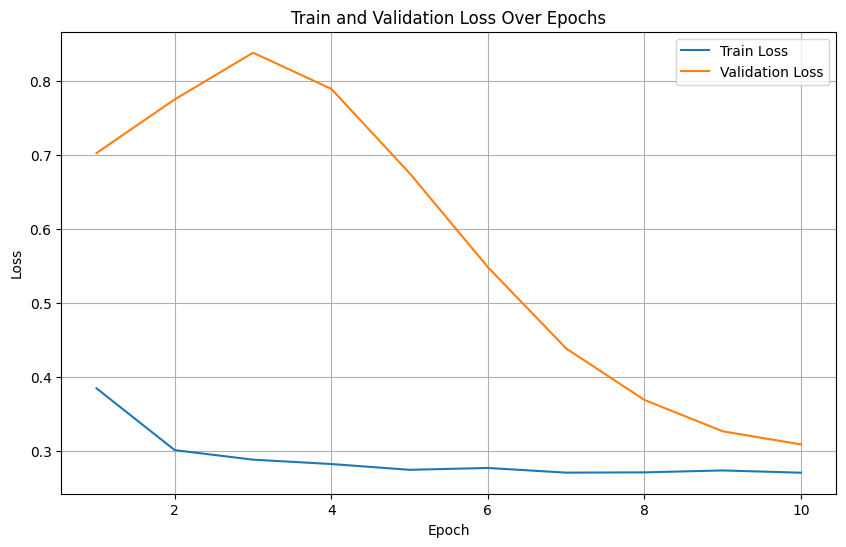

Test Loss: 0.3263, Test Accuracy: 17.40%


(0.32630416192114353, 17.4)

In [72]:
batch_size = 32
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# train_losses, val_losses = train_model(resnet18, train_loader, val_loader, learning_rate=0.001, num_epochs=10, pretrained=True)
# test_model(resnet18, test_loader)

# train_losses, val_losses = train_model(squeezenet, train_loader, val_loader, learning_rate=0.001, num_epochs=10, pretrained=True)
# test_model(squeezenet, test_loader)

train_losses, val_losses = train_model(mobilenetv3, train_loader, val_loader, learning_rate=0.001, num_epochs=10, pretrained=True)
test_model(mobilenetv3, test_loader)

In [24]:
MEAN = [0.485, 0.456, 0.406]
STD = [0.229, 0.224, 0.225]
PRETRAINED_PATH = "./pretrained/saved/"

def load_model(model_name, checkpoint_path, num_classes=NUM_CLASSES):
    if model_name == 'squeezenet':
        model = models.squeezenet1_0(weights=None)
        model.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Conv2d(512, 1, kernel_size=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
        )
    elif model_name == 'resnet18':
        model = models.resnet18(weights=None)
        model.fc = nn.Linear(model.fc.in_features, 1)
    elif model_name == 'mobilenetv3':
        model = models.mobilenet_v3_small(weights=None)
        model.classifier = nn.Sequential(
            nn.Linear(model.classifier[0].in_features, 1),
        )
    else:
        raise ValueError(f"Unsupported model name: {model_name}")

    state_dict = torch.load(checkpoint_path, map_location=torch.device('cpu'), weights_only=True)
    model.load_state_dict(state_dict)

    if model_name == 'squeezenet':
        model.classifier = nn.Identity()
    elif model_name == 'resnet18':
        model.fc = nn.Identity()
    elif model_name == 'mobilenetv3':
        model.classifier = nn.Identity()
    
    model.eval()
    return model

def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')

    image = Image.open(image_path).convert('RGB')
    # image = image.resize((224, 224)) # input size for ResNet18
    image = image.resize((28, 28))  # Resize for SqueezeNet/MobileNetV3
    image_np = np.array(image).astype(np.float32) / 255.0  # Normalize to [0, 1]
    image_np = (image_np - MEAN) / STD  # Normalize with MEAN and STD
    image_np = np.transpose(image_np, (2, 0, 1))  # Convert HWC to CHW
    image_tensor = torch.tensor(image_np, dtype=torch.float32).unsqueeze(0)  # Add batch dimension
    return image_tensor

def extract_features(image_path, model):
    image_tensor = preprocess_image(image_path)
    if image_tensor is None:
        return None
    with torch.no_grad():
        features = model(image_tensor)
    return features.numpy().flatten()

def process_images(mode, model, cropped=True):
    feature_list = []
    filenames = []
    
    if cropped:
        folder = f"{FOLDER_INPUT_PATH}Img_{mode}_cropped/"
    else:
        folder = f"{FOLDER_INPUT_PATH}Img_{mode}/"

    output_csv = f"{FOLDER_OUTPUT_PATH}img_feat_{get_variable_name(model, globals())}_{mode}.csv"
    
    image_files = [img_file for img_file in sorted(os.listdir(folder)) if img_file.endswith('.png')]

    for img_file in tqdm(image_files, desc=f"Processing images in {folder}"):
        img_path = os.path.join(folder, img_file)
        features = extract_features(img_path, model)
        feature_list.append(features)
        filenames.append(img_file)

    feature_df = pd.DataFrame(feature_list)
    feature_df['img_filename'] = filenames
    feature_df.to_csv(output_csv, index=False)
    print(f"Features saved to {output_csv}")

# squeezenet = load_model('squeezenet', f"{PRETRAINED_PATH}SqueezeNet_e10.pth")
# process_images('train', squeezenet)
# process_images('test', squeezenet)
# resnet18 = load_model('resnet18', f"{PRETRAINED_PATH}ResNet_e10.pth")
# process_images('train', resnet18)
# process_images('test', resnet18)
mobilenetv3 = load_model('mobilenetv3', f"{PRETRAINED_PATH}MobileNetV3_e10.pth")
process_images('train', mobilenetv3)
process_images('test', mobilenetv3)

/Users/baptiste/anaconda3/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Processing images in ../data_students/labeled_data/Img_train_cropped/:  23%|██▎       | 233/1000 [00:30<01:39,  7.72it/s]


KeyboardInterrupt: 

### Custom CNNs

In [15]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),  # Output: 32x32
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Output: 16x16
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),  # Output: 16x16
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Output: 8x8
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),  # Flatten from 32 channels x 8 x 8 to 2048
            nn.Linear(32 * 8 * 8, 128),  # Fully connected layer
            nn.ReLU(),
            nn.Linear(128, 1),  # Output layer
            nn.Sigmoid(),  # Sigmoid activation for binary classification
        )

    def forward(self, x):
        features = self.features(x)
        output = self.classifier(features)
        return output

    def extract_features(self, x):
        return self.features(x)

In [16]:
class CNNATrous(nn.Module):
    def __init__(self):
        super(CNNATrous, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=2, dilation=2),  # Output: 32x32
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Output: 16x16
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=4, dilation=4),  # Output: 16x16
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Output: 8x8
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),  # Flatten from 32 channels x 8 x 8 to 2048
            nn.Linear(32 * 8 * 8, 128),  # Fully connected layer
            nn.ReLU(),
            nn.Linear(128, 1),  # Output layer
            nn.Sigmoid(),  # Sigmoid activation for binary classification
        )

    def forward(self, x):
        features = self.features(x)
        output = self.classifier(features)
        return output

    def extract_features(self, x):
        return self.features(x)

In [17]:
class CNNDoubleConv(nn.Module):
    def __init__(self, input_size=(32, 32)):
        super(CNNDoubleConv, self).__init__()
        
        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Downsample to input_size / 2

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Downsample to input_size / 4
        )
        
        with torch.no_grad():
            dummy_input = torch.zeros(1, 1, *input_size)  # Batch size of 1, 1 channel
            flattened_size = self.features(dummy_input).numel()  # Compute output size

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(flattened_size, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        features = self.features(x)
        output = self.classifier(features)
        return output

    def extract_features(self, x):
        return self.features(x)


##### Training and Evaluation

In [33]:
batch_size = 32
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# model = CNN()
# model = CNNATrous()
model = CNNDoubleConv()

save_path = "pretrained"
os.makedirs(save_path, exist_ok=True)
train_losses, val_losses = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    learning_rate=0.001,
    num_epochs=10
)
_,_ = test_model(model, test_loader)

Epoch 1/10 [Training]:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 1/10 [Training]: 100%|██████████| 25/25 [00:01<00:00, 13.03it/s, train_loss=0.743]


Epoch 1 - Train Loss: 0.7130, Val Loss: 0.6931
Model weights saved for epoch 1 as 'pretrained/CNNDoubleConv_e1.pth'


Epoch 2/10 [Training]: 100%|██████████| 25/25 [00:01<00:00, 14.56it/s, train_loss=0.693]


KeyboardInterrupt: 

In [40]:
def extract_features(model, dataset, output_csv):
    model.eval()
    features = []
    image_names = []

    with torch.no_grad():
        for idx in tqdm(range(len(dataset)), desc="Extracting Features"):
            data = dataset[idx]
            if isinstance(data, tuple):  # Si le dataset retourne (image, label)
                image, _ = data
            else:  # Sinon, il ne retourne que l'image
                image = data
            image_name = dataset.image_paths[idx].name if hasattr(dataset, 'image_paths') else f"image_{idx}.png"
            
            if not isinstance(image, torch.Tensor):  # Ensure the image is a tensor
                image = transforms.ToTensor()(image)  # Convert image to tensor if it's not already

            device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
            image = image.unsqueeze(0).to(device)

            feature_vector = model.extract_features(image)
            feature_vector = feature_vector.flatten().cpu().numpy()

            features.append(feature_vector)
            image_names.append(image_name)

    features_array = np.array(features)
    df = pd.DataFrame(features_array)
    df.insert(0, "img_filename", image_names)
    df.to_csv(output_csv, index=False)
    print(f"Features saved to {output_csv}")

epoch = 10                     # CHANGE EPOCH HERE
has_data_augmentation = False   # CHANGE FOR DATA AUGMENTATION HERE
data = ""
if has_data_augmentation:
    data = "augmented_"
model = CNNDoubleConv()
#model.load_state_dict(torch.load(f"pretrained/{type(model).__name__}_e{epoch}.pth", weights_only=True))
output_csv_train = f"{FOLDER_OUTPUT_PATH}img_feat_{type(model).__name__}_{data}train.csv"
extract_features(model, train_dataset, output_csv_train)

output_csv_test = f"{FOLDER_OUTPUT_PATH}img_feat_{type(model).__name__}_{data}test.csv"
extract_features(model, test_dataset, output_csv_test)

output_csv_predict = f"{FOLDER_OUTPUT_PATH_PREDICT}img_features/img_feat_{type(model).__name__}_{data}predict.csv"
extract_features(model, predict_dataset, output_csv_predict)


Extracting Features: 100%|██████████| 1000/1000 [00:00<00:00, 1167.50it/s]


Features saved to ../data_students/labeled_data/img_features/img_feat_CNNDoubleConv_train.csv


Extracting Features: 100%|██████████| 500/500 [00:00<00:00, 925.76it/s]


Features saved to ../data_students/labeled_data/img_features/img_feat_CNNDoubleConv_test.csv


Extracting Features: 100%|██████████| 500/500 [00:00<00:00, 1000.63it/s]


Features saved to ../data_students/unlabeled_data/img_features/img_feat_CNNDoubleConv_predict.csv


# Merging tabular data and images features

In [ ]:
def merge_data(mode, model, augmented=False):
    if mode not in ['train', 'test', 'predict']:
        raise ValueError("Mode must be either 'train' or 'test'.")
    
    if mode == 'predict':
        tabular_csv = f"{FOLDER_INPUT_PATH_PREDICT}X.csv"
        feature_csv = f"{FOLDER_OUTPUT_PATH_PREDICT}img_features/img_feat_{model}_{mode}.csv"
        if augmented:
            feature_csv = f"{FOLDER_OUTPUT_PATH_PREDICT}img_features/img_feat_{model}_augmented_{mode}.csv"
        combined_csv = f"{FOLDER_INPUT_PATH_PREDICT}X_{mode}_combined.csv"

        tabular_data = pd.read_csv(tabular_csv)
        image_features = pd.read_csv(feature_csv)

        combined_data = pd.merge(tabular_data, image_features, on='img_filename', how='inner')
        combined_data = combined_data.drop(columns=['img_filename'])

        combined_data.to_csv(combined_csv, index=False)
        print(f"{mode.capitalize()} data combined and saved to {combined_csv}.")
    else:
        tabular_csv = f"{FOLDER_INPUT_PATH}X_{mode}.csv"
        feature_csv = f"{FOLDER_OUTPUT_PATH}img_feat_{model}_{mode}.csv"
        if augmented:
            feature_csv = f"{FOLDER_OUTPUT_PATH}img_feat_{model}_augmented_{mode}.csv"
        combined_csv = f"{FOLDER_INPUT_PATH}X_{mode}_combined.csv"

        tabular_data = pd.read_csv(tabular_csv)
        image_features = pd.read_csv(feature_csv)

        combined_data = pd.merge(tabular_data, image_features, on='img_filename', how='inner')
        combined_data = combined_data.drop(columns=['img_filename'])

        combined_data.to_csv(combined_csv, index=False)
        print(f"{mode.capitalize()} data combined and saved to {combined_csv}.")

models = {
    1: 'flat',
    2: 'hog',
    3: 'orb',
    4: 'sift',
    5: 'ced',
    6: 'harris',
    7: 'CNN',
    8: 'CNNAtrous',
    9: 'CNNDoubleConv', #best
    10: 'resnet18',
    11: 'squeezenet',
    12: 'mobilenetv3'
}
model = models[9]  # CHANGE MODEL HERE
print(f"Merging data for {model} features...")
merge_data('train', model, augmented=True)
merge_data('test', model, augmented=True)merge_data('predict', model, augmented=True)

Merging data for CNNDoubleConv features...
Train data combined and saved to ../data_students/labeled_data/X_train_combined.csv.
Test data combined and saved to ../data_students/labeled_data/X_test_combined.csv.
Predict data combined and saved to ../data_students/unlabeled_data/X_predict_combined.csv.
